<a href="https://colab.research.google.com/github/JSRV18/Dinosaurio-repository/blob/main/e_m.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!pip install pint
!pip install pint uncertainties
import uncertainties
from uncertainties import ufloat
import pint as pint
ureg=pint.UnitRegistry(auto_reduce_dimensions=True)
Measurement=ureg.Measurement
Quantity=ureg.Quantity

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.0 MB/s eta 0:00:00


In [3]:
import pandas as pd

data= {
    "miliamperios": [12.3, 15.3, 19.4, 21.7, 23.1, 25, 27.4, 29.8, 33.2, 34.5, 36.4, 38.4, 40, 40.6],
    "miliTeslas": [1, 1.3, 1.6,1.8, 2, 2.2, 2.3, 2.4, 2.7, 2.8, 3, 3.1, 3.3, 3.4]
}

df= pd.DataFrame(data)
df

,miliamperios,miliTeslas
0,12.3,1.0
1,15.3,1.3
2,19.4,1.6
3,21.7,1.8
4,23.1,2.0
5,25.0,2.2
6,27.4,2.3
7,29.8,2.4
8,33.2,2.7
9,34.5,2.8


[0.08073068 0.06013191] [[ 3.04911812e-06 -8.64860476e-05]
 [-8.64860476e-05  2.69420223e-03]]


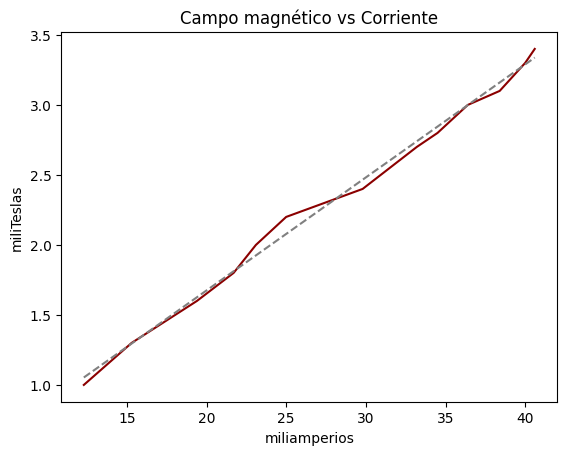

In [6]:
from scipy.optimize import curve_fit

mA= np.array(df["miliamperios"])
mT= np.array(df["miliTeslas"])


def ajuste (x, a, b):
  return a*x + b


popt, pcov= curve_fit(ajuste, mA, mT)
print(popt, pcov)

plt.plot(mA, mT, c="darkred")
plt.plot(mA, ajuste(mA, *popt), "--", c= "grey")
plt.title("Campo magnético vs Corriente")
plt.ylabel("miliTeslas")
plt.xlabel("miliamperios")
plt.show()


In [ ]:
R4 = Quantity(4, 'cm')
R6 = Quantity(6, 'cm')
R8 = Quantity(8, 'cm')
R10 = Quantity(10, 'cm')

V_R4 = Quantity([113, 125, 127, 174, 272], 'mV')
I_R4 = Quantity([22.7, 24.6, 24.9, 31, 39.9], 'mA')

V_R6 = Quantity([213, 229, 241, 273, 312], 'mV')
I_R6 = Quantity([21.5, 22.6, 23.6, 25.2, 26.9], 'mA')

V_R8 = Quantity([208 ,254, 265, 293, 350], 'mV')
I_R8 = Quantity([15.9, 18, 18.6, 19.6, 21.5], 'mA')

V_R10 = Quantity([152, 196, 252, 273, 322], 'mV')
I_R10 = Quantity([9.8, 12, 14.3, 15, 16.4], 'mA')

V_R4 = V_R4.to('V')
V_R6 = V_R6.to('V')
V_R8 = V_R8.to('V')
V_R10 = V_R10.to('V')

In [ ]:
R = Quantity(0.2, 'm')
N = Quantity(154)
mu0 = Quantity(4*np.pi*10**(-7), 'T*m/A')
X = Quantity(12, 'cm')
X = X.to('m')

I_R4 = I_R4.to('A')
I_R6 = I_R6.to('A')
I_R8 = I_R8.to('A')
I_R10 = I_R10.to('A')

B_IR4 = (mu0*R**(2)*N*I_R4)/((R**2 + X**2)**(3/2))
B_IR6 = (mu0*R**(2)*N*I_R6)/((R**2 + X**2)**(3/2))
B_IR8 = (mu0*R**(2)*N*I_R8)/((R**2 + X**2)**(3/2))
B_IR10 = (mu0*R**(2)*N*I_R10)/((R**2 + X**2)**(3/2))

B_IR4 = B_IR4.to('mT')
B_IR6 = B_IR6.to('mT')
B_IR8 = B_IR8.to('mT')
B_IR10 = B_IR10.to('mT')

In [ ]:
R4 = R4.to('m')
R6 = R6.to('m')
R8 = R8.to('m')
R10 = R10.to('m')

em_R4 = (2*V_R4)/(B_IR4*R4)**2
em_R6 = (2*V_R6)/(B_IR6*R6)**2
em_R8 = (2*V_R8)/(B_IR8*R8)**2
em_R10 = (2*V_R10)/(B_IR10*R10)**2

em_R4 = em_R4.to('C/kg')
em_R6 = em_R6.to('C/kg')
em_R8 = em_R8.to('C/kg')
em_R10 = em_R10.to('C/kg')

EM_R4 = np.mean(em_R4)
EM_R6 = np.mean(em_R6)
EM_R8 = np.mean(em_R8)
EM_R10 = np.mean(em_R10)

EM_R4, EM_R6, EM_R8, EM_R10

(<Quantity(659982966601.2126, 'coulomb / kilogram')>,
 <Quantity(657612953358.715, 'coulomb / kilogram')>,
 <Quantity(653627754687.6902, 'coulomb / kilogram')>,
 <Quantity(707848883840.891, 'coulomb / kilogram')>)

/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


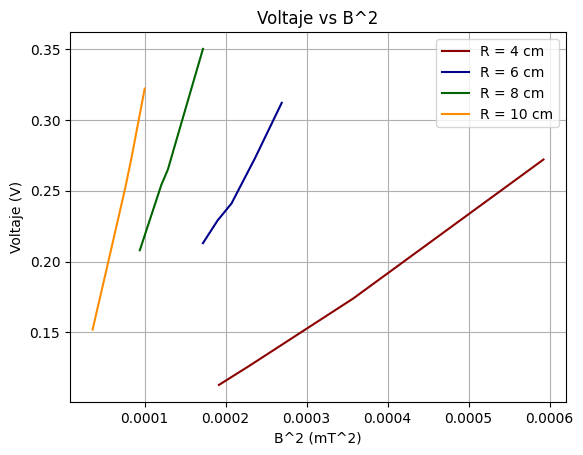

In [ ]:
B_24 = B_IR4**2
B_26 = B_IR6**2
B_28 = B_IR8**2
B_210 = B_IR10**2

B_24 = B_24.to('mT**2')
B_26 = B_26.to('mT**2')
B_28 = B_28.to('mT**2')
B_210 = B_210.to('mT**2')



plt.plot(B_24, V_R4, c = 'darkred', label = 'R = 4 cm')
plt.plot(B_26, V_R6, c = 'darkblue', label = 'R = 6 cm')
plt.plot(B_28, V_R8, c = 'darkgreen', label = 'R = 8 cm')
plt.plot(B_210, V_R10, c = 'darkorange', label = 'R = 10 cm')



plt.xlabel('B^2 (mT^2)')
plt.ylabel('Voltaje (V)')
plt.title('Voltaje vs B^2')
plt.legend()
plt.grid(True)

plt.show()

/usr/local/lib/python3.11/dist-packages/numpy/ma/core.py:2846: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  _data = np.array(data, dtype=dtype, copy=copy,


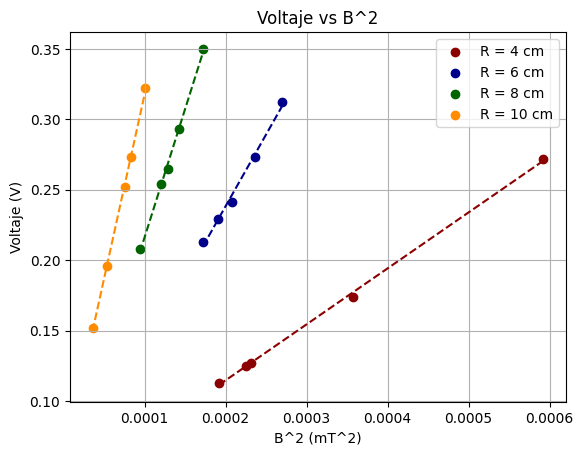

In [ ]:
def ajuste(x, m, b):
    return m * x + b

from scipy.optimize import curve_fit

popt4, pcov4 = curve_fit(ajuste, B_24.m, V_R4.m)
popt6, pcov6 = curve_fit(ajuste, B_26.m, V_R6.m)
popt8, pcov8 = curve_fit(ajuste, B_28.m, V_R8.m)
popt10, pcov10 = curve_fit(ajuste, B_210.m, V_R10.m)

plt.scatter(B_24.m, V_R4.m, label='R = 4 cm', c = 'darkred')
plt.plot(B_24.m, ajuste(B_24.m, *popt4), '--', c = 'darkred')
plt.scatter(B_26.m, V_R6, label='R = 6 cm', c = 'darkblue')
plt.plot(B_26.m, ajuste(B_26.m, *popt6), '--', c = 'darkblue')
plt.scatter(B_28.m, V_R8, label='R = 8 cm', c = 'darkgreen')
plt.plot(B_28.m, ajuste(B_28.m, *popt8), '--', c = 'darkgreen')
plt.scatter(B_210.m, V_R10, label='R = 10 cm', c = 'darkorange')
plt.plot(B_210.m, ajuste(B_210.m, *popt10), '--', c = 'darkorange')

plt.title('Voltaje vs B^2')
plt.xlabel('B^2 (mT^2)')
plt.ylabel('Voltaje (V)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
cm4 = Quantity(popt4[0], 'V/mT**2')
cm6 = Quantity(popt6[0], 'V/mT**2')
cm8 = Quantity(popt8[0], 'V/mT**2')
cm10 = Quantity(popt10[0], 'V/mT**2')


cm4 = (cm4*2)/R4**2
cm6 = (cm6*2)/R6**2
cm8 = (cm8*2)/R8**2
cm10 = (cm10*2)/R10**2

cm4 = cm4.to('A*s/kg')
cm6 = cm6.to('A*s/kg')
cm8 = cm8.to('A*s/kg')
cm10 = cm10.to('A*s/kg')

errcm4 = np.sqrt(pcov4[0][0])
errcm6 = np.sqrt(pcov6[0][0])
errcm8 = np.sqrt(pcov8[0][0])
errcm10 = np.sqrt(pcov10[0][0])

cm4def = ufloat(cm4.m, errcm4) * ureg.A*ureg.s/ureg.kg
cm6def = ufloat(cm6.m, errcm6) * ureg.A*ureg.s/ureg.kg
cm8def = ufloat(cm8.m, errcm8) * ureg.A*ureg.s/ureg.kg
cm10def = ufloat(cm10.m, errcm10) * ureg.A*ureg.s/ureg.kg

cm4def, cm6def, cm8def, cm10def

CMDef = np.mean([cm4def, cm6def, cm8def, cm10def])
CMDef

<Quantity((5.38553+/-0.00000)e+11, 'ampere * second / kilogram')>

In [ ]:
errcm4, errcm6, errcm8, errcm10

ErrDef = np.mean([errcm4, errcm6, errcm8, errcm10])
ErrDef

np.float64(45.35698642013658)